LIMIT

In [ ]:
'''
- Behind the Scene
    + Giả sử bạn đang xem một trận bóng đá, nhưng do đường truyền không ổn định, và kết quả là 
các bạn không biết chuyện gì xảy ra ở phúc thứ 2:00
    + Limit: Chỉ cần lấy hai nút thời gian liền kề (1:59 và 2:01) và dự đoán quả bóng sẽ
ở đâu đó ở giữa thời gian này
    => Dự đoán của mình là 'Vào lúc 2:00, quả bóng nằm giữa vị trí lúc 1:59 và 2:00
    + Với một máy quay chuyển động chậm, thậm chí mình có thể nói nằm giữa 1:59.999
và 2:00.001
'''

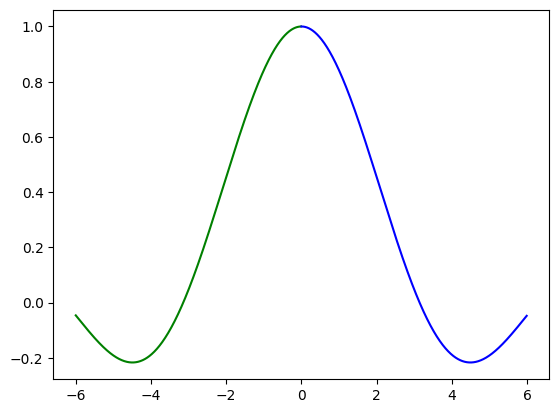

In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np
def func(x):
    y = math.sin(x) / x
    return y

left_x = np.arange(-6, 0, 0.01).tolist() # Giống hàm range()
left_y = [func(x) for x in left_x]
plt.plot(left_x, left_y, 'g')

right_x = np.arange(0 + 1e-6, 6, 0.01).tolist()
right_y = [func(x) for x in right_x]
plt.plot(right_x, right_y, 'b')

plt.show()

In [11]:
# Compute the circumference of a unit circle
def compute_length(degree):
    sin = math.sin(math.radians(degree))
    length = (360 / degree) * sin
    return length
print(compute_length(0.01))

6.283185275280125


In [12]:
# Compute the area of a unit circle
def compute_area(degree):
    sin = math.sin(math.radians(degree))
    cos = math.cos(math.radians(degree))
    area = 1/2 * sin * cos * (360 / degree)
    return area
print(compute_area(0.01))

3.1415925897908705


In [14]:
def get_y(x):
    y = math.sqrt(1 - x ** 2)
    return y

step = 1e-5
x_data = np.arange(-1, 1, step).tolist()
y_data = [get_y(x) for x in x_data]

areas = [y * step for y in y_data]
area = sum(areas)
print(area * 2)

3.1415926164162244


DERIVATIVE

In [ ]:
'''
tangent line = f(a)  + f'(a)(x - a)
Newton's method: gồm các bước sau:
    + Step 1: Khởi tạo giá trị x0 bất kỳ theo f(x) thu được 1 điểm (x0, f(x0))
    + Step 2: Tính f'(x0)
    + Step 3: Nếu f'(x0) != 0. Tìm tangent line
    + Step 4: Tìm vị trí tangent line cắt trục tọa độ x (x_intercept, 0)
    + Step 5: Thay thế x_intercept vào x0 ở step 1. Việc này được lặp lại cho đến khi
x_intercept không còn thay đổi nhiều giữa các lần lặp thì đó chính là solution để f(x) = 0

=> Newton's method: Ước lượng solution của một equation f(x) = 0, bằng cách sử dụng các
tagent line của graph y = f(x) gần những điểm mà làm cho f bằng 0

Example: Tìm xấp xỉ giá trị sqrt(2) với lần lặp 5
    - Gọi x là giá trị cần tìm sqrt(2) ~ x. Biết được x ** 2 ~ 2 -> x ** 2 - 2 ~ 0
    - Gọi f(x) = x**2 - 2. Vậy đi tìm nghiệm x để f(x) = 0. Dùng Newton's method với lần
lặp là 5
    - Khởi tạo x0 = 2 (Khởi tạo bất kỳ ở đây chọn 2)
    - f'(x0) = 2x = 4

i = 1: x1 = x0 - f(x0) / f'(x0) = 1.50000
i = 2: x2 = x1 - f(x1) / f'(x1) = 1.41666
...
i = 5: x5 = x4 - f(x4) / f'(x4) = 1.41421
'''

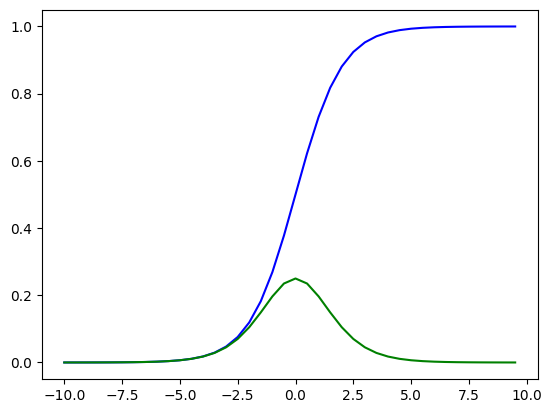

In [16]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def d_sigmoid(x):
    result = sigmoid(x) * (1 - sigmoid(x))
    return result

x_data = np.arange(-10, 10, 0.5).tolist()
y_data = [sigmoid(x) for x in x_data]

dy_data = [d_sigmoid(x) for x in x_data]
plt.plot(x_data, y_data, 'b')
plt.plot(x_data, dy_data, 'g')

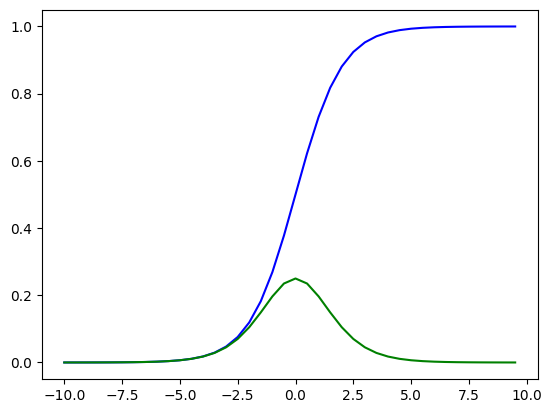

In [17]:
def autograd(x, epsilon=1e-6):
    delta_y = sigmoid(x + epsilon) - sigmoid(x)
    return delta_y / epsilon

x_data = np.arange(-10, 10, 0.5).tolist()
y_data = [sigmoid(x) for x in x_data]

dy_data = [autograd(x) for x in x_data]
plt.plot(x_data, y_data, 'b')
plt.plot(x_data, dy_data, 'g')

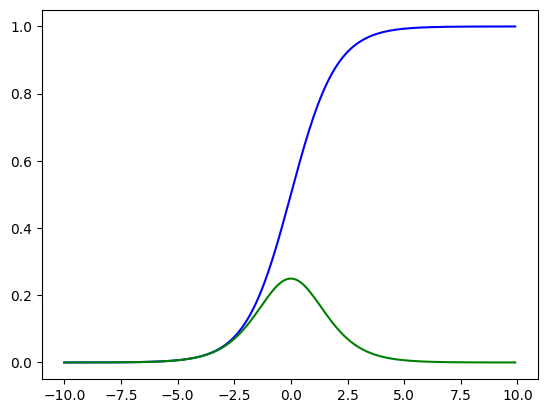

In [ ]:
# Using gradient function
x_data = np.arange(-10, 10, 0.1).tolist()
y_data = [sigmoid(x) for x in x_data]
dy_data = np.gradient(y_data, x_data).tolist()

plt.plot(x_data, y_data, 'b')
plt.plot(x_data, dy_data, 'g')

APPLICATION TO EDGE DETECTION

In [1]:
def derivative_x(data, height, width):
    result = [[0] * width for _ in range(height)]

    # get rows and compute derivatives
    for i in range(height):
        for j in range(width - 1):
            d_value = data[i][j + 1] - data[i][j]
            result[i][j] = abs(d_value)
    return result

data = [
    [1, 2, 3],
    [4, 5, 6]
]
print(derivative_x(data, 2, 3))

[[1, 1, 0], [1, 1, 0]]


In [3]:
def derivative_x_1(data, height, width):
    result = [[0] * width for _ in range(height)]

    for i in range(height):
        for j in range(width):
            d_value = data[i][j + 1] - data[i][j]

            d_value = d_value + 127.5
            d_value = max(0, d_value)
            d_value = min(d_value, 255)
            result[i][j] = d_value
    return result

In [ ]:
import cv2
import numpy as np

img1 = cv2.imread(r"C:\Users\Nguyen\Downloads\11.jpg", 0)
sobelx = cv2.Sobel(img1, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(img1, cv2.CV_64F, 0, 1)
cv2.imwrite('vn_edge_x.jpg', sobelx)
cv2.imwrite('vn_edge_y.jpg', sobely)

True

In [5]:
def func(x, y):
    return x ** 2 + y ** 2
def gradient(func, x, y, epsilon = 1e-4):
    dx = (func(x + epsilon/2, y)) - (func(x - epsilon/2, y))
    dy = (func(x, y + epsilon/2)) - (func(x, y - epsilon/2))
    return dx, dy

In [6]:
import random

x = random.randint(-100, 100)
y = random.randint(-100, 100)

num_iterations = 80
step = 1

for _ in range(num_iterations):
    dx, dy = gradient(func, x, y)

    sign_x = np.sign(dx)
    sign_y = np.sign(y)

    x = x - sign_x * step
    y = y - sign_y * step

PROBLEM

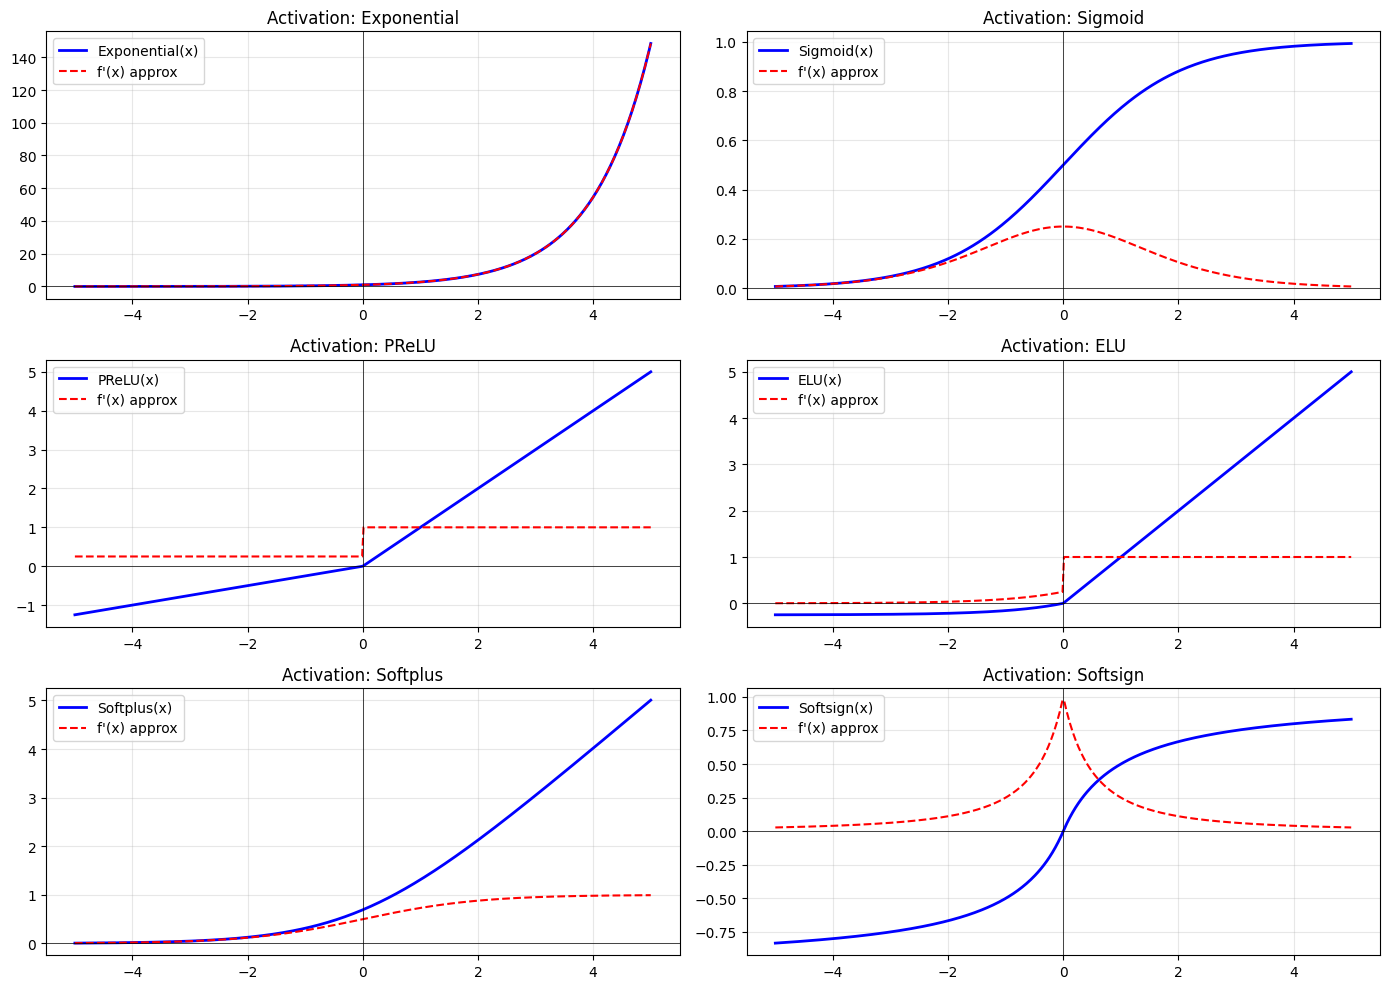

In [34]:
# Problem 1
'''
Trình bày chi tiết đạo hàm các activation function sau và thực hiện code bằng python
(a): Tính đạo hàm và cài đặt
(b): Dùng matplotlib để plot hàm số và hàm đạo hàm 
'''
import math 
import numpy as np
import matplotlib.pyplot as plt

def exponential(x):
    return np.exp(x)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def PReLU(x, alpha = 0.25):
    return np.where(x <= 0, alpha * x, x)
    return result 
def ELU(x, alpha = 0.25):
    return np.where(x <= 0, alpha * (np.exp(x) - 1), x)
def Softplus(x):
    return np.log(1 + np.exp(x))
def Softsign(x):
    return x / (np.abs(x) + 1)
def derivative(f, x, epsilon = 1e-6):
    return (f(x + epsilon/2) - f(x - epsilon/2)) / epsilon


# np.linspace(start, stop, num): Xác định số lượng điểm muốn có
x_data = np.linspace(-5, 5, 400) # 400 điểm từ -5 đến 5
activation_functions = [
    ('Exponential', exponential),
    ('Sigmoid', sigmoid),
    ('PReLU', PReLU),
    ('ELU', ELU),
    ('Softplus', Softplus),
    ('Softsign', Softsign)
]

# plt.figure: Tạo một cửa sổ hình ảnh mới
# figsize: Thiết lập kích thước của cửa sổ theo đơn vị inch (Rộng 14, Cao 10)
plt.figure(figsize=(14, 10))

# enumerate(..., 1): Tham số 1 giúp chỉ số i bắt đầu từ 1 thay vì 0 
# => Phù hợp với cách đánh số của subplot
for i, (name, func) in enumerate(activation_functions, 1):
    y_data = func(x_data)
    y_gradient = derivative(func, x_data)
    '''
    subplot(): Chia bố cục
    + 3: Số hàng
    + 2: Số cột (Lưới 3 x 2 = 6 vị trí cho 6 hàm)
    + i: Vị trí của biểu đồ hiện tại trong lưới (từ 1 đến 6)

    plt.plot(): Vẽ đường nối các điểm (x, y)
    label: Đặt tên cho đường đó (sẽ hiện thị ở chú thích / legend)
    color: Màu sắc
    linewidth = 2: Độ dày của nét vẽ
    linestyle='--': Vẽ nét đứt để phân biệt rõ đạo hàm với hàm gốc
    '''
    plt.subplot(3, 2, i)
    plt.plot(x_data, y_data, label=f'{name}(x)', color='blue', linewidth=2)
    plt.plot(x_data, y_gradient, label=f"f'(x) approx", color='red', linestyle='--')
    '''
    Trang trí biểu đồ con
    - plt.title: Đặt tiêu đề cho từng biểu đồ con
    - axhline / axvline: Vẽ trục Ox (nằm ngang) và Oy (thẳng đứng) đi qua gốc tọa độ để dễ
    quan sát giá trị âm dương
    - grid: Bật lưới ô vuông. alpha = 0.3 làm lưới mờ đi để không gây rối mắt
    - legend(): Hiển thị bảng chú thích các đường đã vẽ (căn cứ vào label ở trên)
    '''
    plt.title(f'Activation: {name}')
    plt.axhline(0, color = 'black', linewidth = 0.5)
    plt.axvline(0, color = 'black', linewidth = 0.5)
    plt.grid(True, alpha = 0.3)
    plt.legend()

'''
- tight_layout: Tự động căn chỉnh khoảng cách giữa các biểu đồ con để tiêu đề và nhãn trục
không bị đè lên nhau
- plt.show(): Xuất lệnh hiển thị cửa sổ đồ thị lên màn hình
'''
plt.tight_layout()
plt.show()